# Ego Analysis of the BitCoin Data

In [1]:
import os
import glob

# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Network Analysis
import networkx as nx
from networkx.algorithms import community
import networkx.algorithms.centrality as nc

## General Analysation

### Get Graph
Generate and print a graph reading the data from all csv files uploaded in the Google Drive

In [150]:
path = 'drive/My Drive/Colab Notebooks/Université Jean Monet/Data Mining for Big Data/Project/'
all_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [158]:
# Plot as directed Graph
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df, 'Source', 'Target', ['value', 'nb_transactions'], create_using=nx.DiGraph)

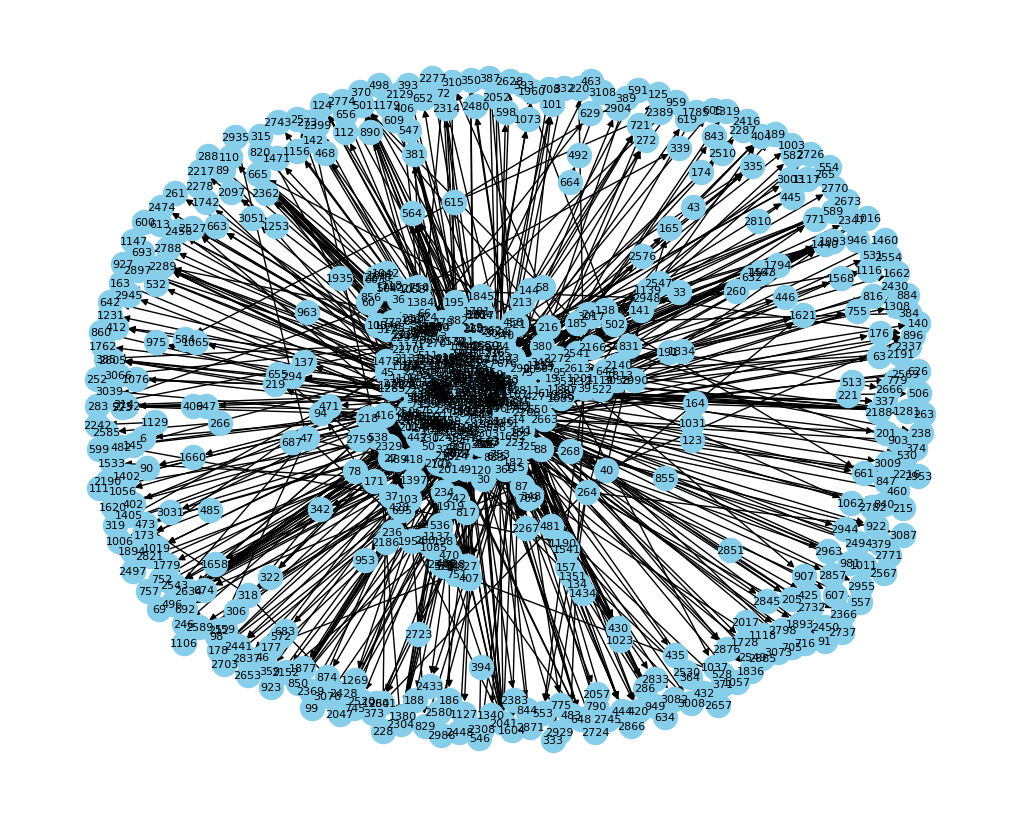

In [154]:
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='skyblue', font_size=8, font_color='black', edge_color='black', width=1, edge_cmap=plt.cm.Blues)
plt.show()

In [157]:
# Use as normal Graph for Analysis
G = nx.from_pandas_edgelist(df, 'Source', 'Target', ['value', 'nb_transactions'], create_using=nx.Graph)

### Connectivity

In [5]:
# Show the connectivity of the analyzed graph
print("The graph has", G.number_of_nodes(), "nodes and", G.number_of_edges(),"edges.")
print("Connectivity: ", nx.node_connectivity(G))

The graph has 852 nodes and 2643 edges.
Connectivity:  0


## Ego Analysis

### Extract Ego Node and display Ego Network

In [36]:
node = 1
ego_G_1 = nx.ego_graph(G, node, center=True)

In [37]:
neighbors = list(G.neighbors(node))
print("Neighbors: " + str(neighbors))

Neighbors: [2636, 1894, 37, 1107, 16, 2210, 380, 107, 1603, 62, 12, 2291, 2323, 38, 762, 61, 55, 959, 353, 72, 11, 28, 283, 321, 2552, 108, 162, 2229, 7, 1915, 2550, 0, 323, 275]


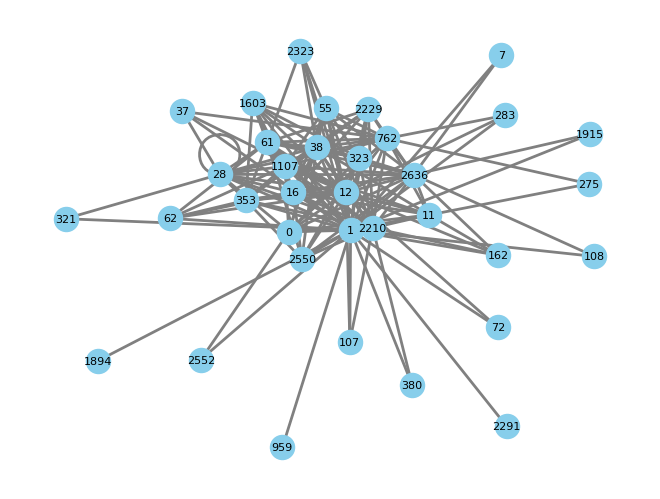

In [8]:
nx.draw(ego_G_1, with_labels=True, node_color='skyblue', font_size=8, font_color='black', edge_color='gray', width=1, edge_cmap=plt.cm.Blues)
plt.show()

In [9]:
node = 2
ego_G_2 = nx.ego_graph(G, node, center=True)

In [10]:
neighbors = list(G.neighbors(node))
print("Neighbors: " + str(neighbors))

Neighbors: [113, 86, 82, 529, 158, 370, 32, 75, 55, 2759, 0, 2610, 79, 470, 2206, 211, 2027, 162, 216, 28, 116, 40, 2210, 984, 239, 2636, 76, 85, 13, 363, 227, 62, 56, 2507, 12, 14, 2270, 73, 38, 27, 115, 330, 88, 2313, 270, 224, 1313, 11, 340]


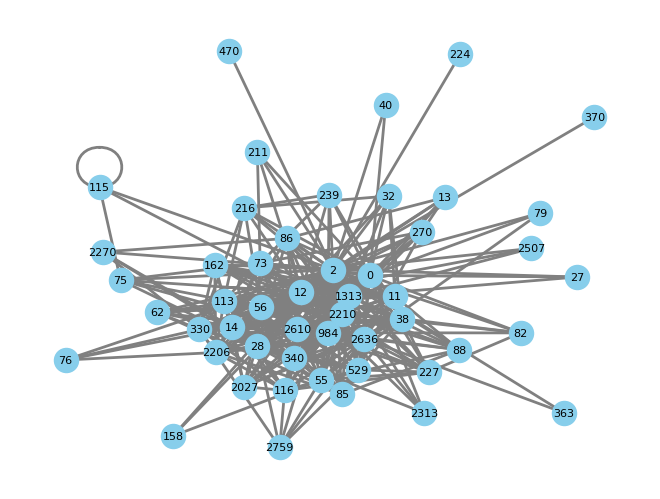

In [11]:
nx.draw(ego_G_2, with_labels=True, node_color='skyblue', font_size=8, font_color='black', edge_color='gray', width=2, edge_cmap=plt.cm.Blues)
plt.show()

### Analze Ego Graph 1

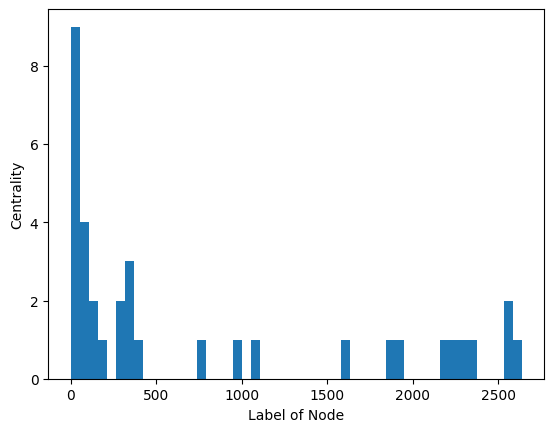

In [12]:
centrality = nx.degree_centrality(ego_G_1)
plt.hist(centrality, bins=50)
plt.xlabel("Label of Node")
plt.ylabel("Centrality")
plt.show()

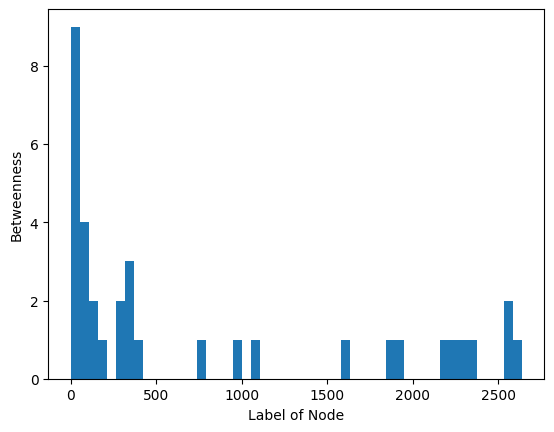

In [13]:
betweenness = nx.betweenness_centrality(ego_G_1)
plt.hist(betweenness, bins=50)
plt.xlabel("Label of Node")
plt.ylabel("Betweenness")
plt.show()

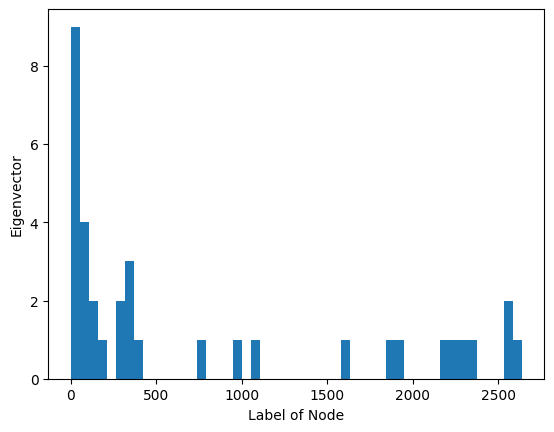

In [14]:
eigenvector = nx.eigenvector_centrality(ego_G_1)
plt.hist(eigenvector, bins=50)
plt.xlabel("Label of Node")
plt.ylabel("Eigenvector")
plt.show()

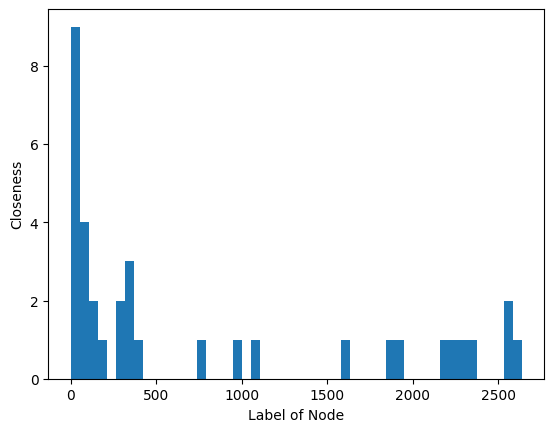

In [15]:
closeness = nx.closeness_centrality(ego_G_1)
plt.hist(closeness, bins=50)
plt.xlabel("Label of Node")
plt.ylabel("Closeness")
plt.show()

### Identify Structural Patterns

In [20]:
# Cliques
cliques = nx.find_cliques(ego_G_1)
i = 1
for clique in cliques:
  print("Clique " + str(i) + ": " + str(clique))
  i += 1

Clique 1: [1, 321, 28]
Clique 2: [1, 1894]
Clique 3: [1, 7, 2636]
Clique 4: [1, 12, 2210, 107]
Clique 5: [1, 12, 2210, 2636, 162, 11]
Clique 6: [1, 12, 2210, 2636, 38, 1107, 0, 762, 11]
Clique 7: [1, 12, 2210, 2636, 38, 1107, 0, 762, 28]
Clique 8: [1, 12, 2210, 2636, 38, 1107, 0, 762, 55]
Clique 9: [1, 12, 2210, 2636, 38, 1107, 16, 353, 61, 28]
Clique 10: [1, 12, 2210, 2636, 38, 1107, 16, 353, 61, 2229]
Clique 11: [1, 12, 2210, 2636, 38, 1107, 16, 11]
Clique 12: [1, 12, 2210, 2636, 38, 1107, 16, 55]
Clique 13: [1, 12, 2210, 2636, 38, 1107, 762, 61, 28]
Clique 14: [1, 12, 2210, 2636, 38, 1107, 762, 61, 2229]
Clique 15: [1, 12, 2210, 2636, 38, 323, 0, 55]
Clique 16: [1, 12, 2210, 2636, 38, 323, 61, 2229]
Clique 17: [1, 12, 2210, 2636, 38, 323, 61, 2550]
Clique 18: [1, 12, 2210, 2636, 38, 2550, 16, 353, 61]
Clique 19: [1, 12, 1603, 38, 61, 1107, 16, 353]
Clique 20: [1, 12, 1603, 38, 61, 1107, 762]
Clique 21: [1, 12, 1603, 38, 61, 323]
Clique 22: [1, 12, 37, 762, 28]
Clique 23: [1, 12, 72]

In [142]:
# Print size of the biggest clique of each node
import json
node_max_clique_number = nx.node_clique_number(ego_G_1)
print_node_max_clique_number = json.dumps(node_max_clique_number, indent=4)
print(print_node_max_clique_number)

# Nodes without clique
value_to_find = 0
if value_to_find in node_max_clique_number.values():
    result = filter(lambda item: item[1] == value_to_find, node_max_clique_number.items())
    matched_items = list(result)
    nodes = [item[0] for item in matched_items]
    print(f"The nodes with the clique size {value_to_find} are {nodes}")
else:
    if value_to_find != 0:
        print("No nodes with clique size " + str(value_to_find))
    else:
        print("No nodes without a clique")

{
    "1": 10,
    "321": 3,
    "28": 10,
    "1894": 2,
    "7": 3,
    "2636": 10,
    "12": 10,
    "2210": 10,
    "107": 4,
    "162": 6,
    "11": 9,
    "38": 10,
    "1107": 10,
    "0": 9,
    "762": 9,
    "55": 9,
    "16": 10,
    "353": 10,
    "61": 10,
    "2229": 10,
    "323": 8,
    "2550": 9,
    "1603": 8,
    "37": 5,
    "72": 3,
    "2323": 5,
    "283": 4,
    "62": 7,
    "108": 3,
    "275": 3,
    "2291": 2,
    "2552": 3,
    "1915": 3,
    "380": 3,
    "959": 2
}
No nodes without a clique


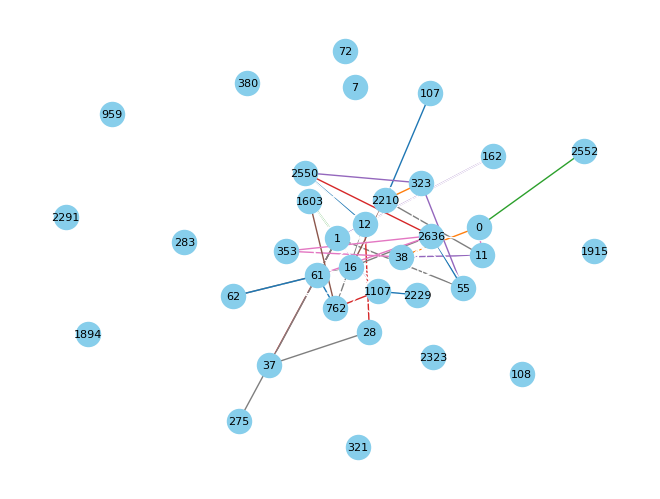

In [146]:
# Print graph and highlight the cliques
cliques = list(nx.find_cliques(ego_G_1))
clique_colors = [f'C{i}' for i in range(len(cliques))]
# Create a dictionary to map each edge to its corresponding clique color, default: white
edge_colors = {edge: 'white' for edge in G.edges()}

# Assign colors based on cliques
for i, clique in enumerate(cliques):
    color = clique_colors[i]
    for edge in G.edges():
        # Check if both nodes of an edge are in the clique
        if edge[0] in clique and edge[1] in clique:
            edge_colors[edge] = color
# Extract edge colors in the same order as the edges in the graph
colors = [edge_colors[edge] for edge in G.edges()]

nx.draw(ego_G_1, with_labels=True, node_color='skyblue', font_size=8, font_color='black', edge_color=colors, width=1, edge_cmap=plt.cm.Blues)
plt.show()

In [18]:
# Hubs
hubs = nx.hits(ego_G_1)[0]
print("Dict containing entries with nodes and their authority: " + str(hubs))

Dict containing entries with nodes and their authority: {0: 0.0383378448563323, 1: 0.06555325304636626, 7: 0.008430919641106515, 11: 0.03448620423105171, 12: 0.060944861648971865, 16: 0.04737548656910423, 2323: 0.018792097329251814, 275: 0.00780306129675356, 283: 0.012078461634520553, 28: 0.04432662216685091, 2210: 0.0543526568062056, 162: 0.01893853851557656, 37: 0.015188060216855202, 38: 0.05504662046916967, 2229: 0.03947654042790509, 55: 0.03703114533602029, 61: 0.04930120266016518, 62: 0.022210149486569134, 959: 0.004598687939115007, 321: 0.007708286521449658, 1603: 0.031831364353240535, 323: 0.036423999144347324, 72: 0.008874088276881999, 2636: 0.05462759330899528, 1107: 0.050738545464874246, 353: 0.04268729165572852, 1894: 0.004598687939115007, 107: 0.012687032649555051, 108: 0.008430919641106515, 2291: 0.004598687939115007, 2550: 0.03271275962312553, 2552: 0.007288162168986967, 762: 0.04567761508269224, 1915: 0.008430919641106515, 380: 0.00841163231178806}


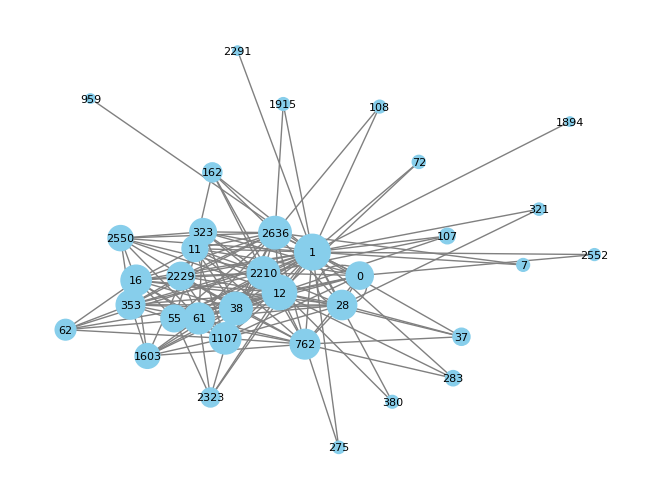

In [73]:
# Print graph with node sizes based on the authority of the nodes
node_sizes = []
for node in hubs:
    node_size = hubs[node]*10000
    node_sizes.append(node_size)
    #print(str(node) + ": " + str(node_size))

nx.draw(ego_G_1, with_labels=True, node_color='skyblue', node_size=node_sizes, font_size=8, font_color='black', edge_color='grey', width=1, edge_cmap=plt.cm.Blues)
plt.show()

In [23]:
# Bridges
bridges = list(nx.bridges(ego_G_1))
print(bridges)

[(1, 1894), (1, 2291), (1, 959)]


(1, 1894)
(1, 2291)
(1, 959)


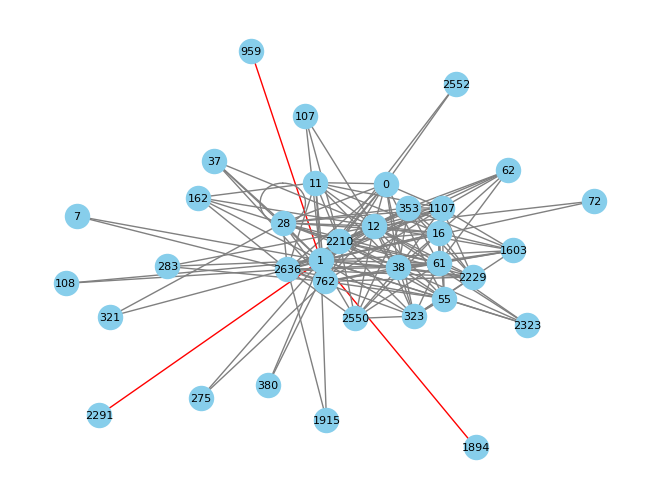

In [74]:
# Print graph and highlight the bridges
options = ['r','gray']
colors = []
for i in ego_G_1.edges():
    if(i in bridges):
        print(i)
        colors.append(options[0])
    else:
        colors.append(options[1])


nx.draw(ego_G_1, with_labels=True, node_color='skyblue', font_size=8, font_color='black', edge_color=colors, width=1, edge_cmap=plt.cm.Blues)
plt.show()

### Determine Node Roles

In [163]:
for i in ego_G_1.nodes():
    print("Connectivity between node " + str(node) + " and node " + str(i) + ": " + str(nx.node_connectivity(G, node, i)))

Connectivity between node 0 and node 0: 36
Connectivity between node 0 and node 1: 9
Connectivity between node 0 and node 7: 5
Connectivity between node 0 and node 11: 28
Connectivity between node 0 and node 12: 33
Connectivity between node 0 and node 16: 24
Connectivity between node 0 and node 2323: 8
Connectivity between node 0 and node 275: 1
Connectivity between node 0 and node 283: 6
Connectivity between node 0 and node 28: 23
Connectivity between node 0 and node 2210: 35
Connectivity between node 0 and node 162: 5
Connectivity between node 0 and node 37: 8
Connectivity between node 0 and node 38: 23
Connectivity between node 0 and node 2229: 18
Connectivity between node 0 and node 55: 4
Connectivity between node 0 and node 61: 20
Connectivity between node 0 and node 62: 13
Connectivity between node 0 and node 959: 2
Connectivity between node 0 and node 321: 3
Connectivity between node 0 and node 1603: 21
Connectivity between node 0 and node 323: 23
Connectivity between node 0 and

In [169]:
# Periphery
print("Periphery nodes: " + str(list(nx.periphery(ego_G_1))))

Periphery nodes: [0, 7, 11, 12, 16, 2323, 275, 283, 28, 2210, 162, 37, 38, 2229, 55, 61, 62, 959, 321, 1603, 323, 72, 2636, 1107, 353, 1894, 107, 108, 2291, 2550, 2552, 762, 1915, 380]
